# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 8

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period, sma=70)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
240,2018-10-04,282.41,2018-11-06,268.44,-13.97,-4932.22,353,84773.35,
241,2019-03-06,272.18,2019-03-13,276.11,3.94,1369.55,348,86142.90,
242,2019-03-22,275.27,2019-04-01,281.75,6.49,2263.66,349,88406.57,
243,2019-05-02,287.03,2019-05-03,289.84,2.81,960.80,342,89367.37,
244,2019-05-07,283.82,2019-06-05,278.92,-4.90,-1714.70,350,87652.67,
245,2019-07-19,294.36,2019-07-24,298.59,4.23,1399.98,331,89052.65,
246,2019-07-31,294.61,2019-08-29,289.81,-4.80,-1614.17,336,87438.48,
247,2019-09-20,296.82,2019-10-11,294.83,-1.99,-652.80,328,86785.68,
248,2019-12-03,308.04,2019-12-12,315.58,7.54,2368.48,314,89154.17,
249,2020-01-27,323.50,2020-02-04,329.06,5.56,1701.36,306,90855.52,


In [8]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-02-10,100855.52,100855.52,100855.52,0,100855.52,-
2020-02-11,100855.52,100855.52,100855.52,0,100855.52,-
2020-02-12,100855.52,100855.52,100855.52,0,100855.52,-
2020-02-13,100855.52,100855.52,100855.52,0,100855.52,-
2020-02-14,100855.52,100855.52,100855.52,0,100855.52,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-02-14
beginning_balance                                           10000
ending_balance                                          100855.52
total_net_profit                                         90855.52
gross_profit                                            139888.77
gross_loss                                              -49033.24
profit_factor                                                2.85
return_on_initial_capital                                  908.56
annual_return_rate                                           9.20
trading_period                           26 years 3 months 3 days
pct_time_in_market                                          31.96
total_num_trades                                              250
trades_per_year                                              9.52
num_winning_trades                                            202
num_losing

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-02-14 00:00:00 SELL 215 SPY @ 337.60


Plot Equity Curves: Strategy vs Benchmark

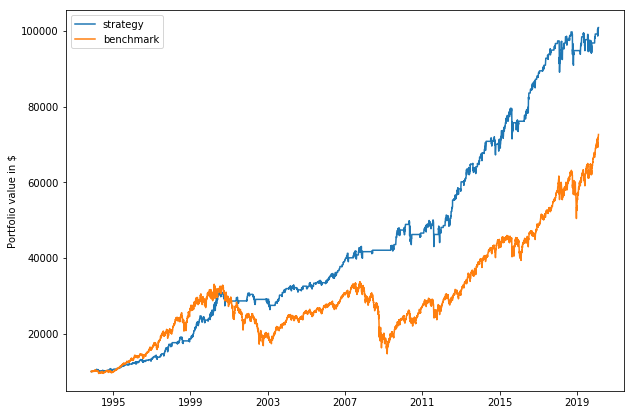

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

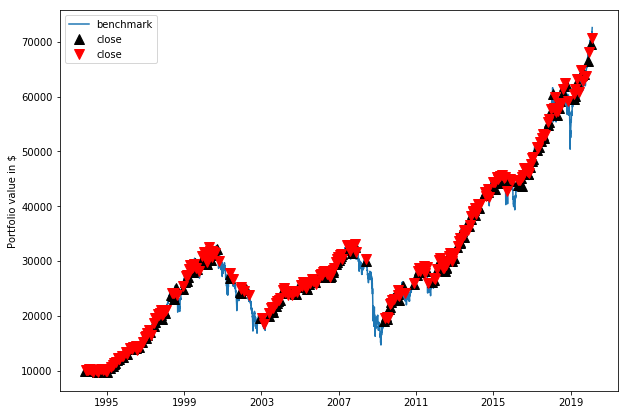

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,9.20,7.84
max_closed_out_drawdown,-14.79,-56.42
drawdown_annualized_return,-1.61,-7.19
drawdown_recovery,-2.61,-1.42
best_month,12.88,22.70
worst_month,-12.28,-29.78
sharpe_ratio,0.91,0.50
sortino_ratio,0.71,0.65
monthly_std,2.25,4.31


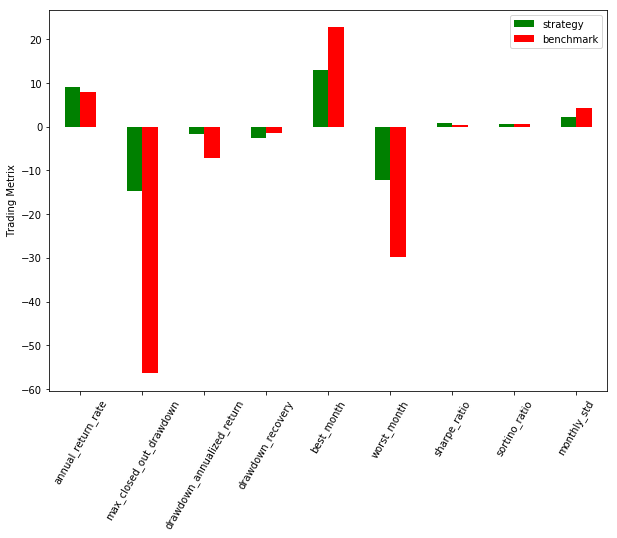

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2020-02-10   100855.52
2020-02-11   100855.52
2020-02-12   100855.52
2020-02-13   100855.52
2020-02-14   100855.52
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-02-10   71985.57
2020-02-11   72110.28
2020-02-12   72574.68
2020-02-13   72497.27
2020-02-14   72613.38
Name: close, dtype: float64

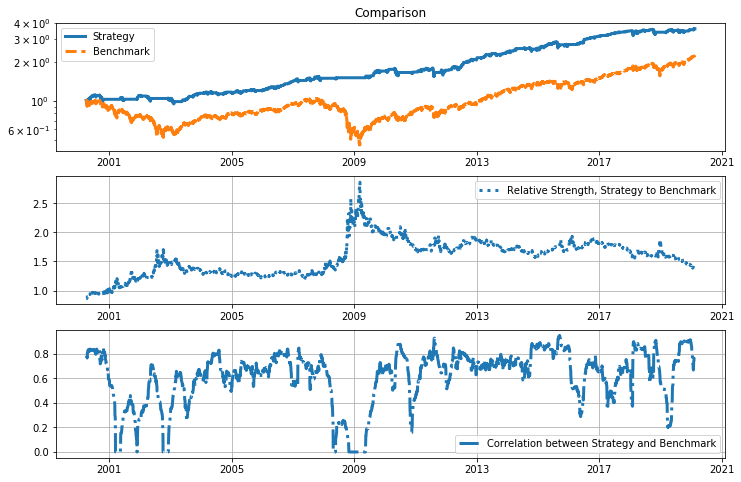

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)